In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dx = 1.0
dt = 0.005
M = 1.0*0.1 # interface mobility
K = 1.0
W = 1.0
mesh_x = 200
phi = np.zeros(mesh_x)
phi[mesh_x//2:] = 1.0 # initializing right half with phase 1

### Allen-Cahn equation
The functional is,
$$ I = \int \big(\frac{K}{2} (\nabla \phi)^2 + f(\phi) \big) dx $$
The free energy in terms of the order parameter $\phi$ is given by the double well potential
$$ f(\phi) = W\phi^2(1-\phi)^2 $$
<br>
The Allen-Cahn evolution equation is,
$$\frac{\partial \phi}{\partial t} = - M \Big[\frac{\partial f}{\partial \phi} - K \nabla^2 \phi\Big] $$

where,
$$ \frac{\partial f}{\partial \phi} = 2W\phi(1-\phi)(1-2\phi) $$

Interface energy (IE) is,
$$ IE = \frac{\sqrt{2KW}}{6} $$

At equilibrium, the free energy and the gradient energy contribution to the interface energy (IE) are equal:
$$ \frac{IE}{2} = \int f(\phi) dx = \int \frac{K}{2} (\nabla \phi)^2 dx $$

### Equilibrium interface profile
The equilibrium diffuse interface profile as derived in the class is,
$$ \eta(x) = \frac{1 + tanh(\frac{x}{2\delta})}{2} $$
where $\delta = \sqrt{\frac{K}{2W}} $.
<br>
We readjust this profile to correspond to our simulation setup,
$$ \eta(x) = \frac{1 + tanh(\frac{x-x_{centre}}{2\delta})}{2} $$
where $x_{centre} = \dfrac{mesh\_x-1}{2}$



In [3]:
def free_energy(phi):
    return W*phi**2*(1.0-phi)**2
def d_free_energy(phi):
    return 2.0*W*phi*(1.0-phi)*(1.0-2*phi)
def laplacian(phi):
    laplacian = np.zeros(mesh_x)
    for i in range(1, mesh_x-1):
        laplacian[i] = (phi[i+1] - 2.0*phi[i] + phi[i-1])/(dx**2)
    return laplacian
def calc_IE(phi):
    IE_ana = np.sqrt(2*K*W)/6
    grad_phi = np.zeros(mesh_x)
    for i in range(1, mesh_x-1):
        grad_phi[i] = ( phi[i+1] - phi[i-1] )/(2.0*dx) # central difference for gradient
    IE_grad = 2.0*np.sum( 0.5*K*grad_phi**2 )*dx
    IE_free_energy = 2.0*np.sum( free_energy(phi) )*dx
    print(IE_ana, IE_grad, IE_free_energy)
    return

<IPython.core.display.Javascript object>


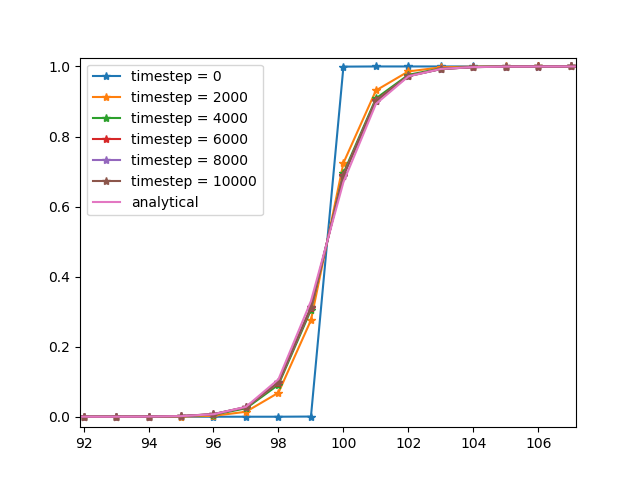

In [4]:
%matplotlib notebook
timesteps = 10001
t_every = 2000
for t in range(timesteps):
    laplacian_phi = laplacian(phi)
    dphi_dt = -M*( d_free_energy(phi) - K*laplacian_phi )
    phi = phi + dphi_dt*dt
    if t%t_every == 0:
        plt.plot(phi, '-*', label='timestep = ' + str(t)) # adds '*' markers over the line plot '-'
        calc_IE(phi) 
x = np.arange(0, mesh_x, dx)
x_centre = (mesh_x-1)/2.0
# ana_phi2 = np.exp( dx*(x - x_centre)/K )/(1+ np.exp( dx*(x-x_centre)/K) ) # readjusting the analytical 
delta = np.sqrt(K/(2*W))
ana_phi = 0.5*( 1 + np.tanh((x - x_centre)/(2*delta)) )
# plt.plot(x, ana_phi2, label='analytical')
plt.plot(x, ana_phi, label='analytical')
plt.legend()
plt.show()